# Installing and Importing Relevant Packages

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.5.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import torch_geometric as torch_geometric
import math

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
import numpy as np

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data, DataLoader

import torch_geometric.transforms as T

#from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv,GINConv
from torch.distributions import Bernoulli,Categorical
import matplotlib.cm as cmx

In [ ]:
import torch
from torch_geometric.data import Data

def align_data_degree_wise(data_list):
    for data in data_list:
        # Compute node degrees
        degrees = torch.zeros(data.num_nodes, dtype=data.x.dtype, device=data.x.device)
        degrees.scatter_add_(0, data.edge_index[0], torch.ones_like(data.edge_index[0], dtype=data.x.dtype))
        degrees.scatter_add_(0, data.edge_index[1], torch.ones_like(data.edge_index[1], dtype=data.x.dtype))

        # Sort nodes based on degrees
        sorted_degrees, sorted_indices = torch.sort(degrees, descending=True)

        # Reorder edge_index and x based on sorted_indices
        data.edge_index[0] = sorted_indices[data.edge_index[0]]
        data.edge_index[1] = sorted_indices[data.edge_index[1]]
        data.x = data.x[sorted_indices]

    return data_list

# Example usage:
# Assuming data_list is a list of PyTorch Geometric Data objects
#aligned_data_list = align_data_degree_wise(data_list)


# Generation of the Shape4 Dataset

In [ ]:
dataset=[]

First we generate windmill graphs and label them as 1




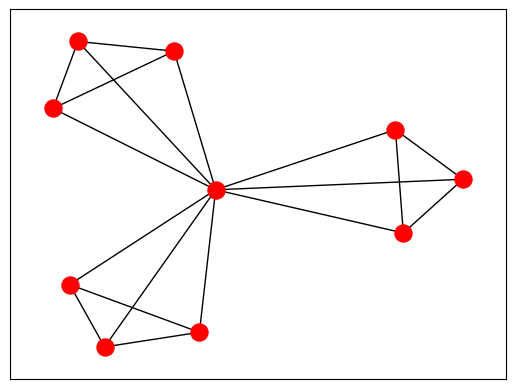

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(1000):
  range1=random.randint(3,9)
  range2=random.randint(3,5)
  m=[i for i in range(range1)]
  n=[i for i in range(range2)]
  Cycle = nx.windmill_graph(range1,range2)
  #Cycle=nx.balanced_tree(range2,range1)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  #p=math.ceil(random.uniform(5,8))








  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=1
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

Next we generate star and label them as 0

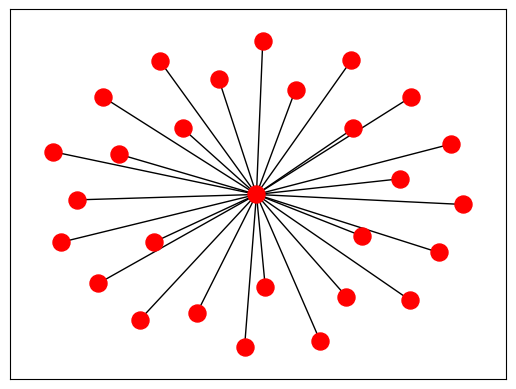

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(1000):
  range1=random.randint(2,5)
  range2=random.randint(6,30)
  m=[i for i in range(range1)]
  n=[i for i in range(range1,range2)]
  Cycle = nx.star_graph(range2)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  #p=math.ceil(random.uniform(5,8))








  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=0
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

We generate barbell and label them as 2

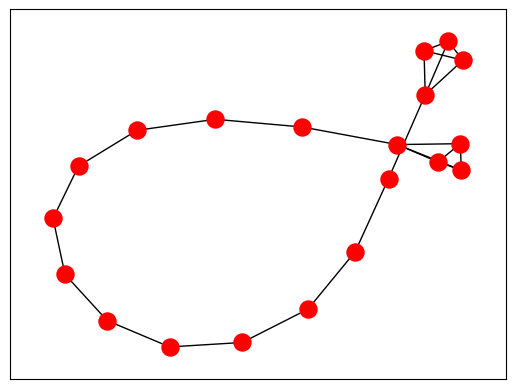

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(1000):
  #num_nodes=random.randint(3,10)




  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(1,4))
  #Cycle = nx.full_rary_tree(p,num_nodes)
  range1=random.randint(2,4)
  range2=random.randint(4,15)
  m=[i for i in range(range1)]
  n=[i for i in range(range1,range2)]
  Cycle=nx.barbell_graph(range1,range2)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes
  y=np.ones(num_nodes)

  #Cycle=nx.wheel_graph(num_nodes)







  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=2
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

Generate grids and label them as 3

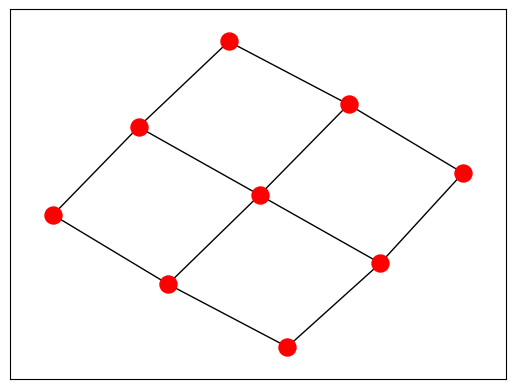

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(1000):
  #num_nodes=random.randint(3,10)




  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(1,4))
  #Cycle = nx.full_rary_tree(p,num_nodes)
  range1=random.randint(2,4)
  range2=random.randint(6,15)
  m=[i for i in range(range1)]
  n=[i for i in range(range1,range2)]
  Cycle=nx.grid_2d_graph(m,n)
  #Cycle=nx.wheel_graph(range2)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes
  y=np.ones(num_nodes)

  #Cycle=nx.wheel_graph(num_nodes)







  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=3
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

# Code to Load and Save Dataset

In [ ]:
import torch

# Example list of tensors (replace this with your actual dataset)
#my_dataset = [torch.randn((3, 64, 64)) for _ in range(100)]

# Define the path to the local folder on Colab where you want to save the dataset
save_path_dataset = '/content/shape4dataset.pt'

# Save the dataset (list of tensors)
torch.save(dataset, save_path_dataset)



In [ ]:
#Code for loading saved dataset


# Define the path to the saved dataset on your local machine


# Define the path to the saved dataset on your local machine
load_path_dataset = '/content/shape4dataset.pt'

# Load the saved dataset (list of tensors)
loaded_dataset = torch.load(load_path_dataset)


# Load the saved dataset (list of tensors)
loaded_dataset = torch.load(load_path_dataset)
dataset=loaded_dataset


# Train-Test Splitting and Batching

In [ ]:
torch.manual_seed(12345)
random.shuffle(dataset)

train_dataset = dataset[:3500]
test_dataset = dataset[3501:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 3500
Number of test graphs: 499


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data.x)
    print()

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Step 1:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 2:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 3:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 4:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 5:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 6:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

Step 7:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        ...,
 

# Definition and Training Classifier

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCNEncoder(torch.nn.Module):
    def __init__(self, inputdim,hidden_channels):
        super(GCNEncoder, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(inputdim, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn = torch.nn.BatchNorm1d(hidden_channels)
        self.dropout = torch.nn.Dropout(0.5)
        self.leaky_relu = torch.nn.LeakyReLU(0.2)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv2(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)
        x = self.bn(x)
        x = F.dropout(x, p=0.5, training=self.training)
        return x

class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LinearClassifier, self).__init__()
        self.linear = Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)
class CombinedModel(torch.nn.Module):
    def __init__(self,inputdim, hidden_channels, num_classes):
        super(CombinedModel, self).__init__()
        self.encoder = GCNEncoder(inputdim,hidden_channels)
        self.classifier = LinearClassifier(input_dim=hidden_channels, num_classes=num_classes)

    def forward(self, x, edge_index, batch):
        # Get the embeddings from the encoder
        embeddings = self.encoder(x, edge_index, batch)

        # Get the logits from the classifier
        logits = self.classifier(embeddings)

        return embeddings, logits
num_features=1
inputdim=num_features
model=CombinedModel(inputdim, hidden_channels=64,num_classes=4)


In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()
scheduler=torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

# Add a learning rate scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.01)

def train():
    model.train()

    for epoch in range(num_epochs):
        for data in train_loader:  # Iterate in batches over the training dataset.
            embedding,  out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
            #print(out)
            loss = criterion(out, data.y)  # Compute the loss.
            loss.backward()  # Derive gradients.
            optimizer.step()  # Update parameters based on gradients.
            optimizer.zero_grad()  # Clear gradients.

        # Update the learning rate scheduler
        scheduler.step()

        # Print the current learning rate every epoch (optional)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss}")
        # train_acc = test(train_loader)
        # test_acc = test(test_loader)
        # print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Set the number of epochs
num_epochs = 700

# Call the training loop
train()



Epoch 1/700, Loss: 0.536439836025238
Epoch 2/700, Loss: 0.4913698434829712
Epoch 3/700, Loss: 0.38826754689216614
Epoch 4/700, Loss: 0.3827388882637024
Epoch 5/700, Loss: 0.455479234457016
Epoch 6/700, Loss: 0.36480218172073364
Epoch 7/700, Loss: 0.2930721938610077
Epoch 8/700, Loss: 0.3741583526134491
Epoch 9/700, Loss: 0.3580493628978729
Epoch 10/700, Loss: 0.32509028911590576
Epoch 11/700, Loss: 0.4487353563308716
Epoch 12/700, Loss: 0.3744906485080719
Epoch 13/700, Loss: 0.3178498446941376
Epoch 14/700, Loss: 0.4147390127182007
Epoch 15/700, Loss: 0.3836860656738281
Epoch 16/700, Loss: 0.5989453792572021
Epoch 17/700, Loss: 0.39563673734664917
Epoch 18/700, Loss: 0.3483336865901947
Epoch 19/700, Loss: 0.3737926185131073
Epoch 20/700, Loss: 0.3541114032268524
Epoch 21/700, Loss: 0.28336313366889954
Epoch 22/700, Loss: 0.29749801754951477
Epoch 23/700, Loss: 0.3737333416938782
Epoch 24/700, Loss: 0.2924245297908783
Epoch 25/700, Loss: 0.3362595736980438
Epoch 26/700, Loss: 0.36994409

# Plotting the Confusion Matrix of the Classifier

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, dataset, class_dict):
    """
    Evaluate the model on the provided dataset, compute the confusion matrix,
    and plot it with class names.

    Parameters:
    - model: Trained GNN model
    - dataset: List of data objects
    - class_dict: Dictionary mapping class labels to class names, e.g., {0: 'Class A', 1: 'Class B'}
    """

    # Step 1: Evaluate the model and get predictions and true labels
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataset:
            _, out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            data.y=torch.tensor(data.y)
            all_preds.append(pred.numpy().flatten())
            all_labels.append(data.y.numpy().flatten())

    print(all_labels)
    print(all_preds)
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Step 2: Compute the confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Step 3: Plot the confusion matrix
    class_names = [class_dict[i] for i in range(len(class_dict))]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage:
# Assuming the class labels are {0: 'Mutagenic', 1: 'Non-Mutagenic'}
#class_dict = {0: 'Mutagenic', 1: 'Non-Mutagenic'}

# Example dataset (assuming it's a list of data objects)
# dataset = [...]

# Call the function with the model, dataset (as a list), and class dictionary
#plot_confusion_matrix(model, dataset, class_dict)


<ipython-input-23-871c3f5df169>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data.y=torch.tensor(data.y)


[array([1]), array([3]), array([2]), array([3]), array([0]), array([3]), array([1]), array([2]), array([2]), array([0]), array([2]), array([2]), array([2]), array([0]), array([1]), array([3]), array([1]), array([1]), array([3]), array([1]), array([3]), array([2]), array([3]), array([2]), array([1]), array([3]), array([1]), array([0]), array([3]), array([2]), array([3]), array([1]), array([2]), array([2]), array([0]), array([0]), array([1]), array([0]), array([3]), array([1]), array([1]), array([0]), array([3]), array([3]), array([1]), array([1]), array([3]), array([2]), array([2]), array([3]), array([3]), array([3]), array([1]), array([1]), array([2]), array([2]), array([0]), array([1]), array([2]), array([2]), array([2]), array([1]), array([2]), array([2]), array([1]), array([0]), array([3]), array([0]), array([3]), array([3]), array([2]), array([0]), array([3]), array([2]), array([3]), array([0]), array([3]), array([1]), array([2]), array([3]), array([1]), array([0]), array([1]), arr

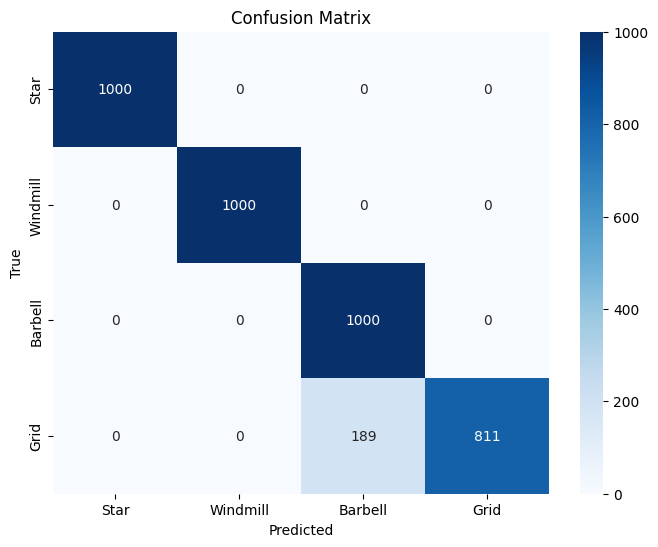

In [ ]:
class_dict={0:'Star',1:'Windmill',2:'Barbell',3:'Grid'}
plot_confusion_matrix(model,dataset,class_dict)

In [ ]:
# model = ImprovedGCNWithMLP(hidden_channels=64, mlp_hidden_channels=128)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()
# # Add a learning rate scheduler
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# def train():
#     model.train()

#     for data in train_loader:  # Iterate in batches over the training dataset.


#         #  print(data.batch)
#         #  # Example troubleshooting steps
#         #  print("Number of nodes:", data.x.size(0))
#         #  print("Node indices in edge_index:", data.edge_index.max().item())
#         #  print("Node features shape:", data.x.shape)
#         #  print("Batch indices:", data.batch.max().item())

#          # Add more debugging information as needed

#          # Example troubleshooting steps


# # Add more debugging information as needed

#          out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
#          loss = criterion(out, data.y)  # Compute the loss.
#          loss.backward()  # Derive gradients.
#          optimizer.step()  # Update parameters based on gradients.
#          optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         #out=torch.cat(out,dim=0)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


# for epoch in range(1, 800):
#     train()

#     train_acc = test(train_loader)
#     test_acc = test(test_loader)
#     print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Code to Save/Load Model

In [ ]:


# Define the path to the local folder on Colab where you want to save the model
save_path = '/content/shape.pth'

# Save the model
torch.save(model.state_dict(), save_path)


In [ ]:

load_path = '/content/shape4.pth'



# Initialize the model architecture

# Load the saved model weights
model.load_state_dict(torch.load(load_path))

# Set the model to evaluation mode
model.eval()


# Binning the data and its corresponding embeddings by passing through the Classifier for further processing using GRM

In [ ]:
data1=[]
data2=[]
data3=[]
data4=[]

latent_data1=[]
latent_data2=[]
latent_data3=[]
latent_data4=[]
for i in range(len(dataset)):
    model.eval()
    data=dataset[i]
    embedding , out = model(data.x, data.edge_index, data.batch)
    pred = out.argmax(dim=1)
    #print(out)
    if(pred==0):
        data1.append(data)
        latent_data1.append(embedding)
    if(pred==1):
        data2.append(data)
        latent_data2.append(embedding)
    if(pred==2):
        data3.append(data)
        latent_data3.append(embedding)
    if(pred==3):
        data4.append(data)
        latent_data4.append(embedding)


print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))

print(data.batch)

#latent_explanations=[]

1000
1000
1189
811
None


# Function to Calculate whether two classes share a decision boundary

In [ ]:
import torch
import torch.nn.functional as F
import random

def adjacency_score(model,classifier, data_list1, data_list2, class_indices, num_samples=1000, steps=1000):
    """
    Calculate adjacency score between two classes.

    Args:
        model (torch.nn.Module): Pre-trained model for classifying embeddings.
        embeddings_list1 (list): List of embeddings for class 1.
        embeddings_list2 (list): List of embeddings for class 2.
        target_class_index (int): Index of the target class for adjacency check.
        num_samples (int): Number of samples to draw from each list for checking.
        steps (int): Number of steps for linear interpolation.

    Returns:
    return score      int: 1 if classes are adjacent, 0 otherwise.
    """
    adjmeasure=0
      # Assume classes are adjacent initially
    with torch.no_grad():
        for _ in range(num_samples):
            # Randomly sample an embedding from each list
            data1 = random.choice(data_list1)
            data2 = random.choice(data_list2)
            emb1,out1=model(data1.x,data1.edge_index,data1.batch)
            emb2,out2=model(data2.x,data2.edge_index,data2.batch)
            score=1

            # Convert to tensors if they're not already
            if not isinstance(emb1, torch.Tensor):
                emb1 = torch.tensor(emb1, dtype=torch.float32)
            if not isinstance(emb2, torch.Tensor):
                emb2 = torch.tensor(emb2, dtype=torch.float32)

            for alpha in torch.linspace(0, 1, steps):
                # Create a linear combination of the embeddings
                combination = alpha * emb1 + (1 - alpha) * emb2

                # Pass the combination through the model to get probabilities
                output = classifier(combination)  # Add batch dimension
                #print(output)
                probabilities = F.softmax(output, dim=1)
                #print(probabilities)

                # Check if the maximum probability belongs to the target class
                if probabilities.argmax(dim=1).item() not in class_indices:
                    score = 0
                    break;
            adjmeasure+=score

    return adjmeasure/num_samples




# Function to extract graphs labelled by classifier above the threshold confidence level

In [ ]:
def Dpc(dataset, threshold):
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    m = torch.nn.Softmax(dim=1)

    for i in range(len(dataset)):
        model.eval()
        data = dataset[i]
        embedding, out = model(data.x, data.edge_index, data.batch)
        probs = m(out)

        if threshold < probs[0][0]:
            data1.append(data)
        if threshold < probs[0][1]:
            data2.append(data)
        if threshold < probs[0][2]:
            data3.append(data)
        if threshold < probs[0][3]:
            data4.append(data)

    return data1, data2, data3, data4


# Graph Representation Model

In [ ]:
from tqdm import tqdm
N=70
def GraphRepModel(targetclass,N):
  #N=25 # Number of nodes of the largest graph that the model can generate

  X=np.zeros((N,2))# Node Type Matrix for nodes of 10 types
  #targetclass=data2
  print("length of target class",len(targetclass))

  #Learning the node representations
  for i in tqdm(range(len(targetclass))):#len(data1))
      data=targetclass[i]
      x=data.x
      x=np.array(x,dtype=int)

      #print(x)
      for j in range(len(x)):
          X[j][x[j]]+=1
      for k in range(j+1,N):
          X[k][0]+=1


  #Learning the edge representations
  Adj=np.zeros((N,N))# Edge type count for only two types edge present/edge absent
  for i in tqdm(range(len(targetclass))):
      data=targetclass[i]
      adj=data.edge_index
      rowlen=len(adj[0][:])
      #print(rowlen)
      #print(adj[:][0])
      #print(adj[:][1])
      for j in range(rowlen):
          k1=adj[0][j]
          k2=adj[1][j]
          Adj[k1][k2]+=1
          #Adj[k2][k1]+=1

  #Learning the parameters for the distribution of nodes
  numgraphs=len(targetclass)
  print(numgraphs)
  X=X/numgraphs #converting X to the node distribution matrix

  Adj=Adj/numgraphs
  return X , Adj



# Extracting the Generative Distributions of all Target Classes

In [ ]:
data1=align_data_degreewise(data1)
data2=align_data_degreewise(data2)
data3=align_data_degreewise(data3)
data4=align_data_degreewise(data4)

In [ ]:
X1,Adj1=GraphRepModel(data1,N)
#print(Adj1)
X2,Adj2=GraphRepModel(data2,N)
X3,Adj3=GraphRepModel(data3,N)
X4,Adj4=GraphRepModel(data4,N)
datalist=[data1,data2,data3,data4]
AllX=[X1,X2,X3,X4]
AllAdj=[Adj1,Adj2,Adj3,Adj4]
#print(Adj2)

NameError: name 'data1' is not defined

#Functions to Calculate Various Graph Statistics

In [ ]:
def degree_distribution(data, N):
    # Find all unique nodes present in the edge index tensor
    all_nodes = torch.unique(torch.cat((data.edge_index[0], data.edge_index[1])))

    # Calculate the number of nodes
    num_nodes = int(all_nodes.max()) + 1 if all_nodes.numel() > 0 else 0  # If there are no nodes, set num_nodes to 0

    # Calculate the degree of each node
    degrees = torch.bincount(data.edge_index[0], minlength=num_nodes)

    # Convert degrees to degree distribution
    degree_values = torch.bincount(degrees)

    # Make sure the tensor is of length N
    degree_distribution = torch.cat((degree_values, torch.zeros(max(N - len(degree_values), 0)).to(degree_values.device)))

    return degree_distribution


def clustering_coefficient(data):
    # Ensure the graph is undirected
    #data = to_undirected(data)

    # Calculate the number of nodes
    num_nodes = data.x.shape[0]

    # Calculate the number of triangles each node is involved in
    num_triangles = torch.zeros(num_nodes, dtype=torch.float)

    # Calculate the number of connected triples each node is involved in
    num_connected_triples = torch.zeros(num_nodes, dtype=torch.float)

    # Iterate over each edge in the graph
    for i, j in data.edge_index.t().tolist():
        # Get the neighbors of node i and node j
        neighbors_i = set(data.edge_index[1][data.edge_index[0] == i].tolist())
        neighbors_j = set(data.edge_index[1][data.edge_index[0] == j].tolist())

        # Calculate the number of common neighbors between i and j
        common_neighbors = neighbors_i.intersection(neighbors_j)

        # Update the number of triangles and connected triples for nodes i and j
        num_triangles[i] += len(common_neighbors)
        num_triangles[j] += len(common_neighbors)
        num_connected_triples[i] += len(neighbors_i) - 1
        num_connected_triples[j] += len(neighbors_j) - 1

    # Print intermediate results for debugging
    #print("Number of triangles per node:", num_triangles)
    #print("Number of connected triples per node:", num_connected_triples)

    # Calculate the local clustering coefficient for each node
    local_clustering_coefficient = (num_triangles / 2) / num_connected_triples
    local_clustering_coefficient[torch.isnan(local_clustering_coefficient)] = 0  # Set NaN values to 0

    # Print intermediate results for debugging
    #print("Local clustering coefficient per node:", local_clustering_coefficient)

    # Calculate the average clustering coefficient
    avg_clustering_coefficient = local_clustering_coefficient.mean()

    return avg_clustering_coefficient

def spectrum_distribution(data, k):
    # Convert PyTorch Geometric Data object to a dense adjacency matrix
    num_nodes = data.num_nodes
    adj_matrix = torch_geometric.utils.to_dense_adj(data.edge_index).squeeze(0)

    # Calculate degree matrix
    degree = torch.sum(adj_matrix, dim=1)
    degree_matrix = torch.diag(degree)

    # Calculate Laplacian matrix
    laplacian_matrix = degree_matrix - adj_matrix

    # Convert Laplacian to dense matrix and numpy array
    laplacian_dense = laplacian_matrix.numpy()

    # Compute eigenvalues
    eigenvalues, _ = np.linalg.eig(laplacian_dense)

    # Sort eigenvalues in ascending order
    eigenvalues = np.sort(eigenvalues)

    # If k is greater than the number of eigenvalues, pad with zeros
    if k > len(eigenvalues):
        padded_eigenvalues = np.pad(eigenvalues, (0, k - len(eigenvalues)), 'constant')
    else:
        padded_eigenvalues = eigenvalues[:k]

    return padded_eigenvalues

# Example usage
# Assuming 'data' is your PyTorch Geometric Data object and 'k' is the desired number of eigenvalues
# eigenvalues = spectrum_distribution(data, k)






# Function to Calculate MMD using Gaussian Kernel

In [ ]:
def mmd_kernel(X, Y, kernel_func):
    """
    Compute Maximum Mean Discrepancy (MMD) between two samples using a given kernel function.

    Parameters:
    - X: torch.Tensor, shape (n_samples, n_features)
    - Y: torch.Tensor, shape (m_samples, n_features)
    - kernel_func: function, kernel function to compute pairwise kernel values

    Returns:
    - mmd: float, Maximum Mean Discrepancy
    """
    m, n = len(X), len(Y)

    # Compute kernel matrices
    K_xx = kernel_func(X, X)
    K_yy = kernel_func(Y, Y)
    K_xy = kernel_func(X, Y)

    # Compute MMD statistic
    mmd = 1.0 / (m * (m - 1)) * torch.sum(K_xx - torch.diag(torch.diagonal(K_xx))) + \
          1.0 / (n * (n - 1)) * torch.sum(K_yy - torch.diag(torch.diagonal(K_yy))) - \
          2.0 / (m * n) * torch.sum(K_xy)

    return mmd.item()  # Convert the result to a Python float

# Example of using a Gaussian (RBF) kernel function for PyTorch
def gaussian_kernel(X, Y, sigma=1.0):
    """
    Gaussian (RBF) kernel function.

    Parameters:
    - X: torch.Tensor, shape (n_samples, n_features)
    - Y: torch.Tensor, shape (m_samples, n_features)
    - sigma: float, bandwidth parameter of the kernel

    Returns:
    - K: torch.Tensor, shape (n_samples, m_samples), kernel matrix
    """
    pairwise_sq_dists = torch.sum(X**2, dim=1, keepdim=True) + torch.sum(Y**2, dim=1, keepdim=True).t() - 2 * torch.mm(X, Y.t())
    K = torch.exp(-pairwise_sq_dists / (2.0 * sigma**2))
    return K




MMD between the two samples: 0.0001


# Function to sample a graph from the generative model

In [ ]:
from torch.distributions import Categorical
from torch_geometric.utils import subgraph
from torch_geometric.utils import remove_isolated_nodes
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
def graphsampler(N,X,Adj,show=False):
  nodeset=[]
  keepnodes=[]
  newnodes=[]
  count=0


  for i in range(N):
      probs=X[i][:]
      probs=torch.from_numpy(probs)
      m=Categorical(probs)
      chosennode=m.sample()
      nodeset.append(chosennode)
      if(chosennode!=0):
          keepnodes.append(i)
          newnodes.append(chosennode)
  # print("Whole set of nodes ")
  # print(nodeset)
  # print("Nodes to keep")
  # print(keepnodes)
  # print(newnodes)
  # #print(Adjacency)
  keepnodescp=keepnodes.copy()
  Adj1=torch.from_numpy(Adj)
  Adjacency= torch.bernoulli(Adj1)
  #Symmetrizing the adjacency matrix as it is a dataset of undirected graphs
  for i in range(N):
    for j in range(i+1):
      Adjacency[i][j]=Adjacency[j][i]
  #print(Adjacency.size())
  # Removing edges generated for absent nodes
  for i in range(len(nodeset)):
    if(nodeset[i]==0):

      Adjacency[i][:]=0
      Adjacency[:][i]=0

  #print("Length of keepnodes list",len(keepnodes))

  templen =  len(keepnodes)
  for j in range(templen):
    testval=0
  # print("value of loop counter j",j)
    place=keepnodes[j]
    #print("corresponding keepnode value",place)
    for k in range(10):
      if(Adjacency[place][k]!=0):
        testval=1
        break
    if(testval==0):
      keepnodescp.remove(place)




  # To test how potent the explainer is we need to feed samples generated from this to the GNN to classify
  #First we need to convert the data into the tensor proper for fitting into the GNN
  edge_ind=Adjacency.nonzero().t().contiguous()
  newgraph=Data(x=nodeset,edge_index=edge_ind)
  #print("Edge index of graph with all nodes")
  #print(edge_ind)
  #print(newgraph.x)


  #print("Finally nodes that remain in the graph")
  #print(keepnodescp)

  extractededge=subgraph(keepnodescp,edge_ind,relabel_nodes=True)
  extedge=subgraph(keepnodescp,edge_ind,relabel_nodes=False)

  # print("Final edges with nodes same as before")
  # print(extedge[0])
  # print("Final edges with relabelled nodes")
  # print(extractededge[0])


  newnodes1=[nodeset[i] for i in keepnodescp]
  newnodes=newnodes1
  x1=torch.ones(len(newnodes),1)
  x1=x1.float()
  newnodes=torch.stack(newnodes)



  newnodes=newnodes.float()


  finalgraph=Data(x=x1,edge_index=extractededge[0])


  embedding,out=model(finalgraph.x,finalgraph.edge_index,finalgraph.batch)
  soft=torch.nn.Softmax(dim=1)
  #print(soft(out))
  #print(out)
  explainergraph=to_networkx(finalgraph,to_undirected=True)
  if show:
    nx.draw_networkx(explainergraph, node_size=150, node_color='red',with_labels=False)
  problities=soft(out)
  explainernodes=nx.number_of_nodes(explainergraph)
  explaineredges=nx.number_of_edges(explainergraph)
  explainerdensity=(explaineredges)/(explainernodes*explainernodes)
  return problities,explainerdensity,embedding,explainergraph

# Function for Target Class Analysis

In [ ]:
import statistics
import torch

def target_class_analysis(X, Adj, N, latent,numexplanations=50, numsample=10, label=0):
    """
    Analyzes the robustness of a target class in graph data by sampling graphs
    and evaluating accuracy, density, and other metrics.

    Args:
        X: Node feature matrix.
        Adj: Adjacency matrix.
        N: Number of nodes in the graph.
        latent: Latent space embeddings of the original data.
        numexplanations: Number of explanations to generate.
        numsample: Number of samples to generate.
        label: Target class label to analyze (default: 0).

    Returns:
        meanaccuracy: Mean accuracy.
        stdaccuracy: Standard deviation of accuracies.
        meandensity: Mean density.
        stddensity: Standard deviation of densities.
        MMD: Maximum Mean Discrepancy (MMD) distance.
        degreedistlist: Degree distributions across samples.
        cluslist: Clustering coefficients across samples.
        speclist: Spectral metrics across samples.
    """
    accuracy = []
    density = []
    embeddings = []
    degreedistlist = []
    cluslist = []
    speclist = []

    for _ in range(50):
        newX = X  # Placeholder for potential feature perturbation
        newAdj = Adj  # Placeholder for potential adjacency perturbation
        max_prob = 0

        for _ in range(numsample):
            probabilities, explainerdensity, embedding, explainergraph = graphsampler(N, newX, newAdj)

            if probabilities[0][label] > max_prob:
                sampleaccuracy = probabilities[0][label]
                sampledensity = explainerdensity
                sampleembedding = embedding
                sampledeg = degreedistb
                sampleclus = clus
                samplespec = spec
                max_prob = probabilities[0][label]

        accuracy.append(sampleaccuracy)
        density.append(sampledensity)
        embeddings.append(sampleembedding)
        degreedistlist.append(sampledeg)
        cluslist.append(sampleclus)
        speclist.append(samplespec)

    meanaccuracy = torch.mean(torch.tensor(accuracy))
    stdaccuracy = torch.std(torch.tensor(accuracy))
    meandensity = statistics.mean(density)
    stddensity = statistics.stdev(density)

    MMD = mmd_kernel(torch.cat(latent, dim=0), torch.cat(embeddings, dim=0), gaussian_kernel)

    return meanaccuracy, stdaccuracy, meandensity, stddensity, MMD, degreedistlist, cluslist, speclist


# Using the Above Function to generate metrics for a Target CLass

In [ ]:
import time
start_time=time.time()
meanacc,stdacc, meandensity, stddensity, MMD, deg,cluslist,speclist  =target_class_analysis(X2,Adj2,N,latent_data2,50,20,1)
print("--- %s seconds ---" % (time.time() - start_time))



# Function to Approximate the Boundary Generative Distribution and Sample from it

In [ ]:
def boundarysampler(class_indices,N, AdjList=AllAdj,Xlist=AllAdj,numtrials=100,numsample=100,pmix=0.5):
  label1=class_indices[0]
  label2=class_indices[1]
  print(label1,label2)
  X1=AllX[label1]
  X2=AllX[label2]
  Adj1=AdjList[label1]
  Adj2=AdjList[label2]
  X=pmix*X1+(1-pmix)*X2
  Adj=pmix*Adj1+(1-pmix)*Adj2
  accuracies=[]
  embeddings=[]
  acc2=[]
  for _ in range(numtrials):
    min_difference = float('inf')
    sample_accuracy = None
    sample_embedding = None

    for _ in range(numsample):
        probabilities, _, embedding = graphsampler(N, X, Adj, show=False)

        # Difference in class scores
        score_diff = abs(probabilities[0][label1] - probabilities[0][label2])

        if score_diff < min_difference:
            min_difference = score_diff
            sample_accuracy = probabilities[0][label1]
            otheracc=1-probabilities[0][label1]
            sample_embedding = embedding

    accuracies.append(sample_accuracy)
    acc2.append(otheracc)
    embeddings.append(sample_embedding)

  # Calculate mean and standard deviation of accuracies
  mean_accuracy = torch.mean(torch.tensor(accuracies))
  mean_acc2=torch.mean(torch.tensor(acc2))
  std_accuracy = torch.std(torch.tensor(accuracies))
  return mean_accuracy,mean_acc2, std_accuracy, embeddings


0-Star
1-Windmill
2-Barbell
3-Grid

# First find out whether two classes share a boundary by computing their adjacency score. If the score is above 0.9, consider that they share a boundary

In [ ]:
classifier=model.classifier
class_indices=[0,1]
adjscore=adjacency_score(model,classifier,data1,data2,class_indices)
print(adjscore)


1.0


In [ ]:
#class_indices=[0,2]
accuracies,acc2, stdacc, embeddings=boundarysampler([0,3],N,AllAdj,AllX,numtrials=2,numsample=300)
print(accuracies)
print(stdacc)

# Functions to Compute Boundary Metrics

In [ ]:
# Computing boundary metrics
import torch
import torch.nn.functional as F

def boundary_margin(embeddings_c1, embeddings_c2):
    """
    Compute the boundary margin.

    Args:
    - embeddings_c1 (torch.Tensor): Embeddings of class c1 graphs.
    - embeddings_c2 (torch.Tensor): Embeddings of boundary graphs between class c1 and c2.

    Returns:
    - margin (float): The boundary margin.

    """
    embeddings_c1=torch.cat(embeddings_c1,dim=0)
    embeddings_c2=torch.cat(embeddings_c2,dim=0)
    distances = torch.norm(embeddings_c1 - embeddings_c2, dim=1)
    margin = torch.min(distances).item()
    return margin

def boundary_thickness(embeddings_c1, embeddings_c1_c2, model, c1, c2, gamma=0.75, num_points=100):
    thickness_values = []

    for emb_c1, emb_c1_c2 in zip(embeddings_c1, embeddings_c1_c2):
        t_values = torch.linspace(0, 1, num_points)
        h_t = (1 - t_values).unsqueeze(1) * emb_c1 + t_values.unsqueeze(1) * emb_c1_c2
        #print(model(h_t).size())

        # Compute the logits
        logits_h_t = model(h_t)  # Assuming `model` is your classifier
        probs_h_t = F.softmax(logits_h_t, dim=1)

        # Compute the integrand
        integrand = (gamma > (probs_h_t[:, c1] - probs_h_t[:, c2])).float()

        # Approximate the integral using the trapezoidal rule
        integral = torch.trapz(integrand, t_values)

        # Compute the thickness value
        thickness_value = (emb_c1 - emb_c1_c2).norm() * integral.mean()
        thickness_values.append(thickness_value.item())

    return sum(thickness_values) / len(thickness_values)

# def boundary_complexity(embeddings, D):
#     """
#     Compute the boundary complexity.

#     Args:
#     - embeddings (torch.Tensor): Embeddings of the boundary graphs with shape (num_graphs, embedding_dim).
#     - D (int): Dimensionality of the embeddings.

#     Returns:
#     - complexity (float): The boundary complexity.
#     """
#     # Compute the covariance matrix of the embeddings
#     embeddings=torch.cat(embeddings,dim=0)
#     covariance_matrix = torch.cov(embeddings.T)

#     # Compute the eigenvalues of the covariance matrix
#     eigenvalues = torch.linalg.eigvalsh(covariance_matrix)
#     print(eigenvalues)

#     # Normalize the eigenvalues
#     eigenvalues_normalized = eigenvalues / eigenvalues.sum()
#     print(eigenvalues_normalized)

#     # Compute the entropy of the normalized eigenvalues
#     entropy = -torch.sum(eigenvalues_normalized * torch.log(eigenvalues_normalized + 1e-7))
#     print(entropy)

#     # Normalize the entropy by dividing it by log(D)
#     complexity = entropy / torch.log(torch.tensor(D, dtype=torch.float32))

#     return complexity.item()
def boundary_complexity(embeddings, D, epsilon=1e-7):
    """
    Compute the boundary complexity.

    Args:
    - embeddings (torch.Tensor): Embeddings of the boundary graphs with shape (num_graphs, embedding_dim).
    - D (int): Dimensionality of the embeddings.
    - epsilon (float): Small value added to eigenvalues to prevent log(0).

    Returns:
    - complexity (float): The boundary complexity.
    """
    # Flatten and concatenate embeddings
    embeddings = torch.cat(embeddings, dim=0)

    # Compute the covariance matrix of the embeddings
    covariance_matrix = torch.cov(embeddings.T)

    # Add a small value to the diagonal for regularization
    covariance_matrix += epsilon * torch.eye(covariance_matrix.size(0))

    # Compute the eigenvalues of the covariance matrix
    eigenvalues = torch.linalg.eigvalsh(covariance_matrix)

    # Clamp eigenvalues to avoid very small negative values due to numerical errors
    eigenvalues = torch.clamp(eigenvalues, min=epsilon)

    # Normalize the eigenvalues
    eigenvalues_normalized = eigenvalues / eigenvalues.sum()

    # Compute the entropy of the normalized eigenvalues
    entropy = -torch.sum(eigenvalues_normalized * torch.log(eigenvalues_normalized + epsilon))

    # Normalize the entropy by dividing it by log(D)
    complexity = entropy / torch.log(torch.tensor(D, dtype=torch.float32))

    return complexity.item()

In [ ]:
boundaryembeddings=embeddings
latent_data=latent_data2
margin=boundary_margin(boundaryembeddings[:len(latent_data)],latent_data)
print(margin)
thickness=boundary_thickness(boundaryembeddings[:len(latent_data)],latent_data,model.classifier,1,0)
print(thickness)
complexity=boundary_complexity(boundaryembeddings[:len(latent_data)],64)
print(complexity)

1.846235752105713
64.27653145328725
0.005051757209002972


# Function for Sensitivity Analysis


In [ ]:
import statistics
def sensitivityanalysis(X,Adj,N,numsample,label=0):
  epsilon=0.01
  alpha=0.0
  # perturbedX=perturbX(X,epsilon)
  # perturbedAdj=perturbadj(Adj,epsilon)
  meanaccuracy=[]
  stdaccuracy=[]
  meandensity=[]
  stddensity=[]
  MMD=[]

  while(alpha==0.0):
    accuracy=[]
    density=[]
    embeddings=[]
    for i in range(100):
      newX=X#nodefeatcomb(perturbedX,X,alpha)
      newAdj=Adj#adjcomb(perturbedAdj,Adj,alpha)
      max=0
      for num in range(numsample):
        problities,explainerdensity,embedding=graphsampler(N,newX,newAdj)
        #max=problities[0][label]
        if(problities[0][label]>max):
          sampleaccuracy=problities[0][label]
          sampledensity=explainerdensity
          sampleembedding=embedding
          max=problities[0][label]
      accuracy.append(sampleaccuracy)
      density.append(sampledensity)
      embeddings.append(sampleembedding)
    meanacc=torch.mean(torch.stack(accuracy))
    stdacc=torch.std(torch.stack(accuracy))
    meanden=statistics.mean(density)
    stdden=statistics.stdev(density)
    meanaccuracy.append(meanacc)
    stdaccuracy.append(stdacc)
    # meandensity.append(meanden)
    # stddensity.append(stdden)
    # MMDdist=mmd_kernel(torch.cat(latent,dim=0),torch.cat(embeddings,dim=0),gaussian_kernel)
    # MMD.append(MMDdist)
    alpha+=0.05
  return meanaccuracy , stdaccuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_with_error(mean, std, threshold, label, numsample,title=None, ax=None):
    """
    Plot mean with error bars.

    Parameters:
        mean (array_like): Array containing mean values.
        std (array_like): Array containing standard deviation values.
        threshold (array_like): Array containing threshold values.
        label (str): Label for the data.
        color (str): Color of the line.
        numsample (int): Sample number.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. If not provided, a new figure will be created.
    """
    # Flatten the arrays
    mean=torch.tensor(mean,dtype=torch.float32)
    std=torch.tensor(std,dtype=torch.float32)
    mean = np.array(mean).flatten()
    std = np.array(std).flatten()
    threshold = np.array(threshold).flatten()
    # Select color automatically
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    color = colors[numsample % 10]  # Cycle through colors

    # Plotting
    if ax is None:
        fig, ax = plt.subplots()
    ax.errorbar(threshold, mean, yerr=std, fmt='-', color=color, label=f'NumSample={numsample}')  # '-' for line

    # Adding labels and title
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)

    ax.legend(loc='lower right',fontsize='small')  # Show legend
    ax.grid(True)  # Add grid
# # Create a figure outside the function
# fig, ax = plt.subplots()
# plot_mean_with_error(Mean1,Std1,Threshold,label='class1',numsample=1,ax=ax)
# plot_mean_with_error(Mean2,Std2,Threshold,label='class1',numsample=2,ax=ax)
# plt.show()


# Sensitivity Analysis by Varying p_c and numsample

length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2332.66it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1347.69it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2487.59it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3543.62it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1474.86it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 979.49it/s] 


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2353.26it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3453.69it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2349.69it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1329.98it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2406.44it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3573.85it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1366.18it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1335.60it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2434.09it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3382.25it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2340.10it/s]


1000
length of target class 1509


100%|██████████| 1509/1509 [00:01<00:00, 1177.56it/s]


1509
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2223.52it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 2974.69it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1380.08it/s]


1000
length of target class 1358


100%|██████████| 1358/1358 [00:01<00:00, 1012.61it/s]


1358
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2257.92it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 2663.77it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2483.81it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1201.44it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2402.50it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3248.00it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1375.09it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 827.79it/s] 


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2452.42it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 2172.64it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2348.25it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1005.95it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2412.53it/s]


1085
length of target class 204


100%|██████████| 204/204 [00:00<00:00, 2733.15it/s]


204
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1374.89it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:01<00:00, 667.42it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2248.50it/s]


1085
length of target class 103


100%|██████████| 103/103 [00:00<00:00, 3111.68it/s]


103
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2382.86it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1315.12it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2319.56it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3439.27it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1948.09it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1364.29it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2476.81it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3295.94it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2333.02it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1337.10it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2301.42it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3579.76it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2378.73it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1351.55it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2458.42it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 2856.70it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2417.12it/s]


1000
length of target class 1509


100%|██████████| 1509/1509 [00:01<00:00, 1207.10it/s]


1509
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2505.45it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3280.69it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2387.40it/s]


1000
length of target class 1358


100%|██████████| 1358/1358 [00:01<00:00, 1237.27it/s]


1358
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2398.41it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3486.12it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2355.30it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1104.26it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2149.20it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3023.93it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2385.70it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1165.03it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2520.08it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3349.71it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2401.17it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1054.08it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2493.95it/s]


1085
length of target class 204


100%|██████████| 204/204 [00:00<00:00, 3044.30it/s]


204
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2439.33it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1046.97it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2452.02it/s]


1085
length of target class 103


100%|██████████| 103/103 [00:00<00:00, 2862.08it/s]


103
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2172.55it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1365.24it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2380.97it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3428.55it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2367.69it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1360.93it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2490.99it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3264.94it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2372.30it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1341.34it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2219.86it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3293.71it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2333.64it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1322.87it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2285.99it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3321.33it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1341.73it/s]


1000
length of target class 1509


100%|██████████| 1509/1509 [00:01<00:00, 1257.56it/s]


1509
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2162.61it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 2051.12it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2189.71it/s]


1000
length of target class 1358


100%|██████████| 1358/1358 [00:01<00:00, 1151.12it/s]


1358
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2388.79it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3400.97it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2273.86it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1186.43it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 1778.11it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 1900.57it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2381.57it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1124.03it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2351.00it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3384.38it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2330.67it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1028.40it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2466.25it/s]


1085
length of target class 204


100%|██████████| 204/204 [00:00<00:00, 2531.43it/s]


204
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2403.01it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:01<00:00, 646.10it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 1359.96it/s]


1085
length of target class 103


100%|██████████| 103/103 [00:00<00:00, 3069.13it/s]


103
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2325.04it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1376.52it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2395.89it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3460.89it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2331.63it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1332.84it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2241.45it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3400.43it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2347.24it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1350.72it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2389.48it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3391.14it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1328.01it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 940.39it/s] 


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2416.38it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3152.78it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2418.98it/s]


1000
length of target class 1509


100%|██████████| 1509/1509 [00:01<00:00, 1264.70it/s]


1509
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 1461.66it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 1900.57it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2271.61it/s]


1000
length of target class 1358


100%|██████████| 1358/1358 [00:01<00:00, 1072.72it/s]


1358
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2483.96it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3064.32it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2416.68it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1175.20it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2471.98it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3202.61it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2361.79it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1180.21it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2429.78it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3184.01it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1498.40it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:01<00:00, 731.14it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2433.80it/s]


1085
length of target class 204


100%|██████████| 204/204 [00:00<00:00, 2686.89it/s]


204
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2528.38it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1001.44it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2348.67it/s]


1085
length of target class 103


100%|██████████| 103/103 [00:00<00:00, 2741.08it/s]


103
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2387.32it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1371.15it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2502.78it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3087.40it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1226.45it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1357.63it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2385.16it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3488.10it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2364.68it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1344.79it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2481.05it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3442.52it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2224.69it/s]


1000
length of target class 1669


100%|██████████| 1669/1669 [00:01<00:00, 1329.50it/s]


1669
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2485.54it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3172.99it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2389.44it/s]


1000
length of target class 1509


100%|██████████| 1509/1509 [00:01<00:00, 950.14it/s]


1509
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 1484.46it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 1964.26it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2331.82it/s]


1000
length of target class 1358


100%|██████████| 1358/1358 [00:01<00:00, 1209.71it/s]


1358
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2394.76it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3258.93it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2281.01it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1194.15it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2357.81it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3336.64it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2096.81it/s]


1000
length of target class 1263


100%|██████████| 1263/1263 [00:01<00:00, 1149.94it/s]


1263
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2476.52it/s]


1085
length of target class 246


100%|██████████| 246/246 [00:00<00:00, 3033.50it/s]


246
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 1790.39it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:01<00:00, 610.50it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 1875.55it/s]


1085
length of target class 204


100%|██████████| 204/204 [00:00<00:00, 3069.33it/s]


204
length of target class 1000


100%|██████████| 1000/1000 [00:00<00:00, 2371.55it/s]


1000
length of target class 951


100%|██████████| 951/951 [00:00<00:00, 1033.14it/s]


951
length of target class 1085


100%|██████████| 1085/1085 [00:00<00:00, 2314.52it/s]


1085
length of target class 103


100%|██████████| 103/103 [00:00<00:00, 2582.93it/s]


103


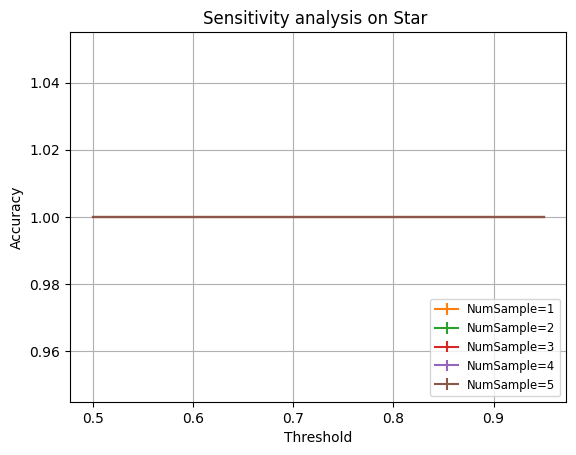

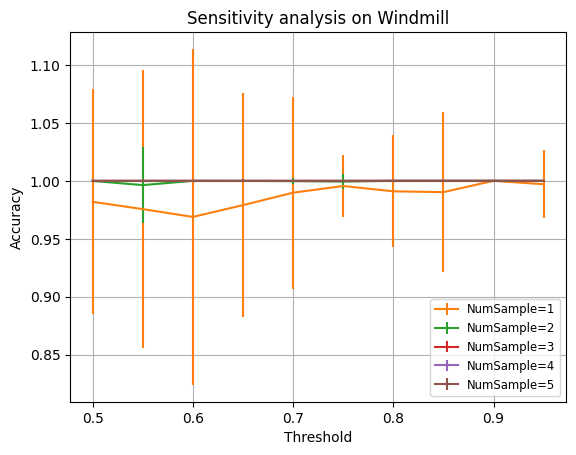

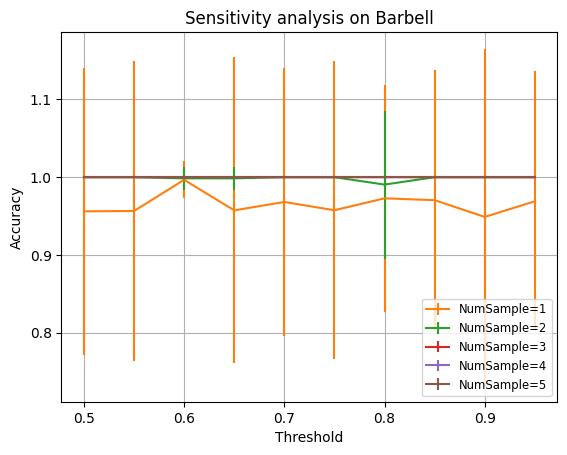

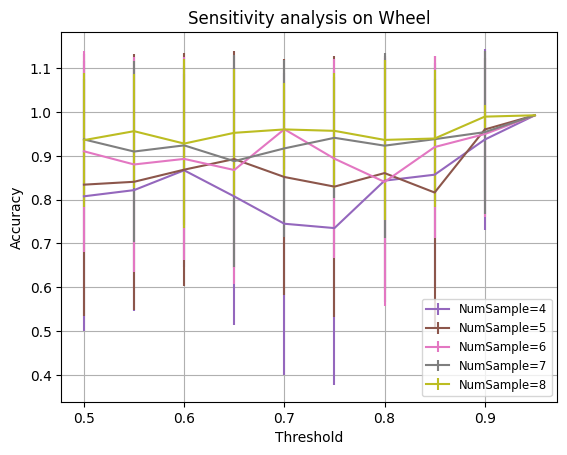

In [ ]:
samplerange=6
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3= plt.subplots()
fig4, ax4= plt.subplots()
for numsample in range(1,samplerange):
  threshold=0.5
  Threshold=[]
  Mean1=[]
  Std1=[]
  Mean2=[]
  Std2=[]
  Mean3=[]
  Std3=[]
  Mean4=[]
  Std4=[]
  while(threshold<1):
    Threshold.append(threshold)
    data1 , data2, data3, data4=Dpc(dataset,threshold)
    X1,Adj1=GraphRepModel(data1,N)
    X2,Adj2=GraphRepModel(data2,N)
    X3,Adj3=GraphRepModel(data3,N)
    X4,Adj4=GraphRepModel(data4,N)
    mean1,std1=sensitivityanalysis(X1,Adj1,N,numsample,0)
    Mean1.append(mean1)
    Std1.append(std1)
    mean2,std2=sensitivityanalysis(X2,Adj2,N,numsample,1)
    Mean2.append(mean2)
    Std2.append(std2)
    mean3,std3=sensitivityanalysis(X3,Adj3,N,numsample,2)
    Mean3.append(mean3)
    Std3.append(std3)
    mean4,std4=sensitivityanalysis(X4,Adj4,N,numsample+3,3)
    Mean4.append(mean4)
    Std4.append(std4)

    threshold+=0.05
  plot_mean_with_error(Mean1,Std1,Threshold,label='class1',numsample=numsample,title='Sensitivity analysis on Star ',ax=ax1)
  plot_mean_with_error(Mean2,Std2,Threshold,label='class2',numsample=numsample,title='Sensitivity analysis on Windmill',ax=ax2)
  plot_mean_with_error(Mean3,Std3,Threshold,label='class3',numsample=numsample,title='Sensitivity analysis on Barbell',ax=ax3)
  plot_mean_with_error(Mean4,Std4,Threshold,label='class4',numsample=numsample+3,title='Sensitivity analysis on Wheel',ax=ax4)

plt.show()

